# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [28]:
pip install pandas  

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd 

In [30]:
import numpy as np 

In [31]:
pip install pandas openpyxl pyodbc 

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [32]:
df = pd.read_excel(r"Online Retail.xlsx", engine='openpyxl')  

In [33]:
df.head()  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [34]:
print(df.shape)  

(541909, 8)


In [35]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [36]:
print(df.isnull().sum())  

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [37]:
print(df.dtypes)  

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [38]:
df.drop_duplicates(inplace=True)  

In [39]:
df = df.dropna()  

In [40]:
print(df.shape)  

(401604, 8)


In [41]:
df['CustomerID'] = pd.Series(df['CustomerID'], dtype="string") 

In [42]:
print(df.dtypes)  

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [43]:
# Total Sales per transaction   
df['TotalSales'] = df['Quantity'] * df['UnitPrice']  

In [44]:
# Extract Month and Day from InvoiceDate   
df['Month'] = df['InvoiceDate'].dt.month
df['Weekday'] = df['InvoiceDate'].dt.day_name()  

In [45]:
df.head()  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Wednesday


In [46]:
df.describe()  

,Quantity,UnitPrice,CustomerID,TotalSales,Month
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638,7.595407
std,250.283037,69.764035,1714.006089,430.352218,3.417451
min,-80995.000000,0.000000,12346.000000,-168469.600000,1.000000
25%,2.000000,1.250000,13939.000000,4.250000,5.000000
50%,5.000000,1.950000,15145.000000,11.700000,8.000000
75%,12.000000,3.750000,16784.000000,19.800000,11.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,12.000000


In [47]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# 1. Sales Trends Over Time  
a. Monthly sales  b. Sales by day of week or Weekday  

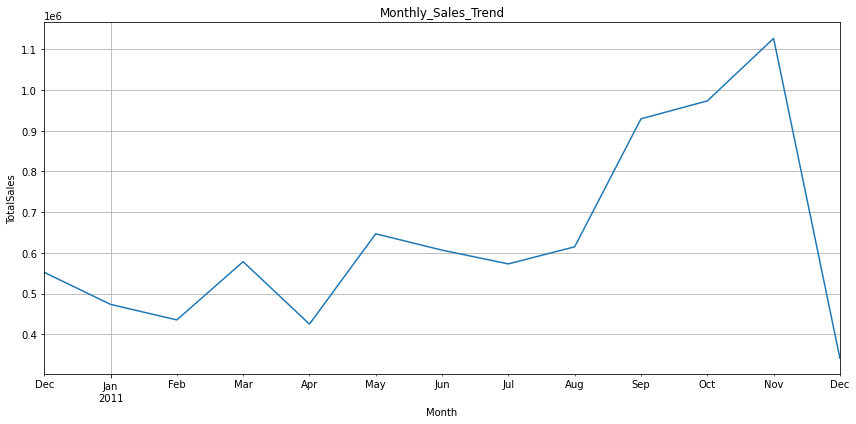

In [48]:
import pandas as pd
import matplotlib.pyplot as plt 

# Set the date as index and resample monthly
monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalSales'].sum()

# Plotting the trend
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly_Sales_Trend')
plt.ylabel("TotalSales")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


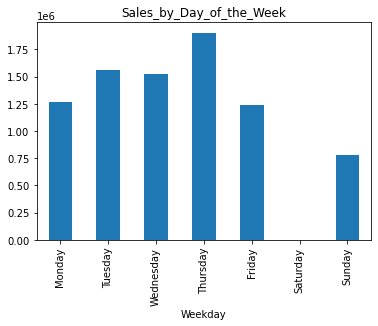

In [49]:
weekday_sales = df.groupby('Weekday')['TotalSales'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

weekday_sales.plot(kind='bar', title='Sales_by_Day_of_the_Week')  

In [50]:
saturday_sales = df[df['Weekday'] == 'Saturday']

# Check if there are any sales on Saturday
if saturday_sales.empty:
    print("No sales on Saturday.")
else:
    print(f"Number of Saturday transactions: {len(saturday_sales)}")
    print(f"Total Saturday Sales: {saturday_sales['Sales'].sum()}")

No sales on Saturday.


# 2. Top Product   

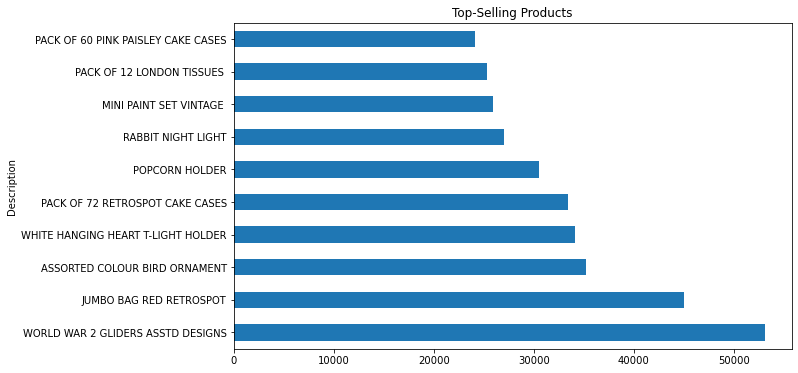

In [51]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10) 
top_products.plot(kind='barh', title='Top-Selling Products', figsize=(10,6))  


# 3. Sales by Country   

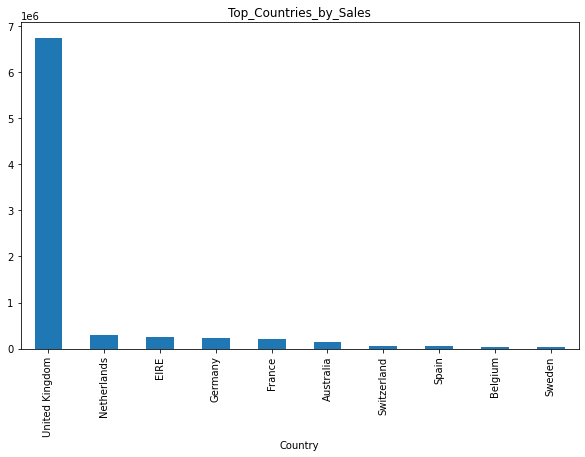

In [52]:
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10) 
country_sales.plot(kind='bar', title='Top_Countries_by_Sales', figsize=(10,6))  

# 4. Outliers & Anomalies, Spot unusual transactions   

Text(0.5, 1.0, 'Transaction Value Distribution')

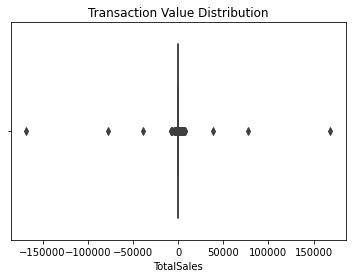

In [53]:
sns.boxplot(x=df['TotalSales']) 
plt.title('Transaction Value Distribution')   


# 5. Key Customer Analysis   

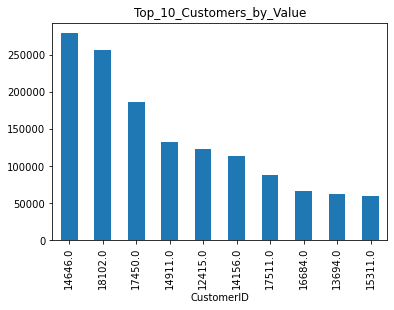

In [54]:
customer_sales = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(10) 
customer_sales.plot(kind='bar', title='Top_10_Customers_by_Value')  


# Key Questions and their Answers and Insights. 

Which months has the most sales? Are there any seasonal patterns?   
: October, November and December have the peak, probably due to holiday season 

Which products sell the most? 
: WORLD WAR 2 GLIDERS ASSTD DESIGNS, JUMBRO BAG RED RETROSPOT, POPCORN HOLDER 

Who are the top customers? 
: customerID 14646.0 , 18102.0  

Which countries generate most revenue?  
: UK dominates, followed by Netherlands, EIRE.    

# Recommendations   

1. Promotions during peak months 
2. Focus marketing on high-selling products 
3. Build loyalty with top customers. 
